# Telecom Industry Churn Prediction

Customer churn is basically the loss of customers or clients for a given organization

The aim is to explore this type of models and learn more about the subject. Telephone benefit companies, Web benefit suppliers, pay TV companies, protections firms, and caution checking administrations, regularly utilize client whittling down examination and client steady loss rates as one of their key trade measurements since the fetched of holding an existing client is distant less than obtaining a modern one. Companies from these segments frequently have client benefit branches which endeavor to win back absconding clients, since recouped long-term clients can be worth much more to a company than recently enlisted clients. Predictive analytics utilize churn forecast models that foresee client churn by evaluating their affinity of hazard to churn. Since these models create a little prioritized list of potential deserters, they are compelling at centering client maintenance promoting programs on the subset of the client base who are most helpless to churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customerChurn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
customerChurn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customerChurn_data.shape

(7043, 21)

In [5]:
c_5 = customerChurn_data.iloc[:,4] 
c_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [6]:
c_15 = customerChurn_data.iloc[:,14]
c_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [7]:

senior_Electronic = customerChurn_data[(customerChurn_data['gender']=='Male') & (customerChurn_data['SeniorCitizen']==1 ) & (customerChurn_data['PaymentMethod']== "Electronic check")]

In [8]:
senior_Electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [9]:
c_random = customerChurn_data[(customerChurn_data['tenure'] > 70) | (customerChurn_data['MonthlyCharges'] > 100)]

In [10]:
c_random = customerChurn_data[(customerChurn_data['Contract'] == "Two year"  ) & (customerChurn_data['PaymentMethod']== "Mailed check" ) & (customerChurn_data["Churn"] == "Yes")]

In [11]:
customer_333 = customerChurn_data.sample(n =333)

In [12]:
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5725,9648-BCHKM,Female,0,Yes,Yes,18,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.65,471.35,No
1474,9495-SKLKD,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.95,4456.65,No
1959,5882-CMAZQ,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,34.25,163.55,No
6348,1025-FALIX,Female,0,No,No,26,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.05,1815.65,No
6920,2595-KIWPV,Male,0,No,Yes,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.70,509.3,No


In [13]:
customer_333.shape

(333, 21)

In [14]:
customerChurn_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
customerChurn_data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
customerChurn_data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [17]:
customerChurn_data.sort_values(by = "tenure", ascending = True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,6024-RUGGH,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.20,1798.9,No
917,4079-WWQQQ,Male,0,No,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.55,4807.45,No
4574,8999-XXGNS,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.75,7629.85,No
3635,5296-PSYVW,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,24.55,1750.7,No


In [18]:
customerChurn_data.sort_values(by = "TotalCharges", ascending = False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


## Data Visualization 

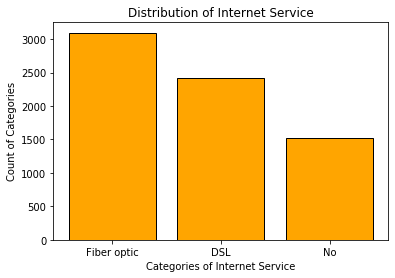

In [19]:
plt.bar(customerChurn_data["InternetService"].value_counts().keys().tolist(), customerChurn_data["InternetService"].value_counts().tolist(), color = "orange", edgecolor = "black")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()


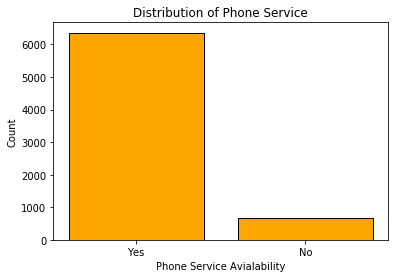

In [20]:
plt.bar(customerChurn_data["PhoneService"].value_counts().keys().tolist(), customerChurn_data["PhoneService"].value_counts().tolist(), color = "orange", edgecolor = "black")
plt.xlabel("Phone Service Avialability")
plt.ylabel("Count")
plt.title("Distribution of Phone Service")
plt.show()


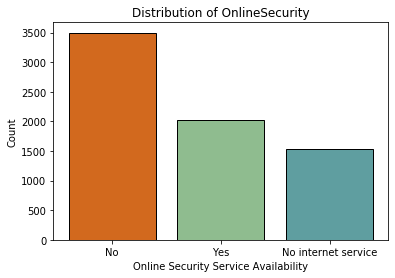

In [21]:
plt.bar(customerChurn_data["OnlineSecurity"].value_counts().keys().tolist(), customerChurn_data["OnlineSecurity"].value_counts().tolist(), color = ["chocolate","darkseagreen","cadetblue"], edgecolor = "black")
plt.xlabel("Online Security Service Availability")
plt.ylabel("Count")
plt.title("Distribution of OnlineSecurity")
plt.show()

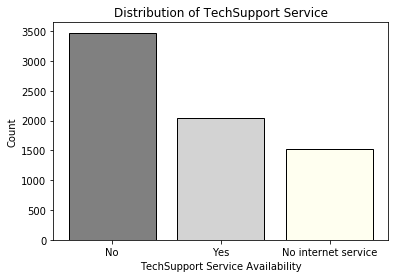

In [22]:
plt.bar(customerChurn_data["TechSupport"].value_counts().keys().tolist(), customerChurn_data["TechSupport"].value_counts().tolist(), color = ["gray","lightgrey","ivory"], edgecolor = "black")
plt.xlabel("TechSupport Service Availability")
plt.ylabel("Count")
plt.title("Distribution of TechSupport Service")
plt.show()

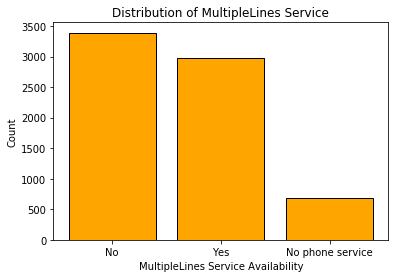

In [23]:
plt.bar(customerChurn_data["MultipleLines"].value_counts().keys().tolist(), customerChurn_data["MultipleLines"].value_counts().tolist(), color = "orange", edgecolor ="black")
plt.xlabel("MultipleLines Service Availability")
plt.ylabel("Count")
plt.title("Distribution of MultipleLines Service")
plt.show()

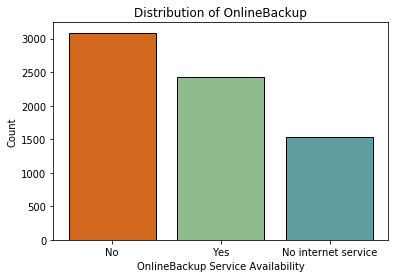

In [24]:
plt.bar(customerChurn_data["OnlineBackup"].value_counts().keys().tolist(), customerChurn_data["OnlineBackup"].value_counts().tolist(), color = ["chocolate","darkseagreen","cadetblue"], edgecolor = "black")
plt.xlabel("OnlineBackup Service Availability")
plt.ylabel("Count")
plt.title("Distribution of OnlineBackup")
plt.show()

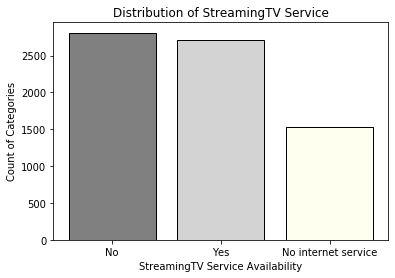

In [25]:
plt.bar(customerChurn_data["StreamingTV"].value_counts().keys().tolist(), customerChurn_data["StreamingTV"].value_counts().tolist(), color = ["gray","lightgrey","ivory"], edgecolor = "black")
plt.xlabel("StreamingTV Service Availability")
plt.ylabel("Count of Categories")
plt.title("Distribution of StreamingTV Service")
plt.show()

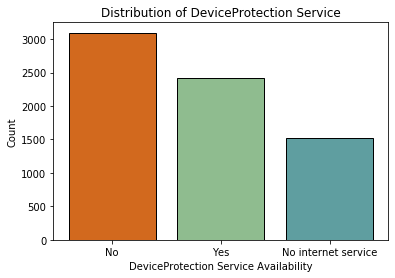

In [26]:
plt.bar(customerChurn_data["DeviceProtection"].value_counts().keys().tolist(), customerChurn_data["DeviceProtection"].value_counts().tolist(), color = ["chocolate","darkseagreen","cadetblue"], edgecolor = "black")
plt.xlabel("DeviceProtection Service Availability")
plt.ylabel("Count")
plt.title("Distribution of DeviceProtection Service")
plt.show()

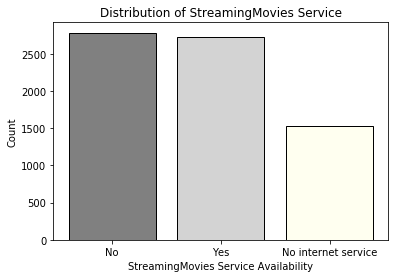

In [27]:
plt.bar(customerChurn_data["StreamingMovies"].value_counts().keys().tolist(), customerChurn_data["StreamingMovies"].value_counts().tolist(), color = ["gray","lightgrey","ivory"], edgecolor = "black")
plt.xlabel("StreamingMovies Service Availability")
plt.ylabel("Count")
plt.title("Distribution of StreamingMovies Service")
plt.show()

In [28]:
customerChurn_data["InternetService"].value_counts().keys().tolist()

['Fiber optic', 'DSL', 'No']

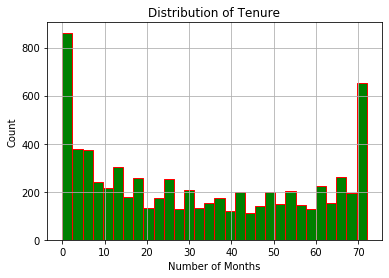

In [29]:
plt.hist(customerChurn_data["tenure"], bins=30, edgecolor= "red", color = "green" )
plt.title("Distribution of Tenure")
plt.xlabel("Number of Months")
plt.ylabel("Count")
plt.grid(True)
plt.show()

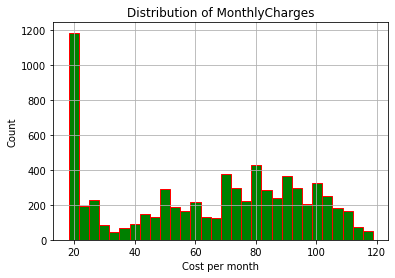

In [30]:
plt.hist(customerChurn_data["MonthlyCharges"], bins=30, edgecolor= "red", color = "green" )
plt.title("Distribution of MonthlyCharges")
plt.xlabel("Cost per month")
plt.ylabel("Count")
plt.grid(True)
plt.show()

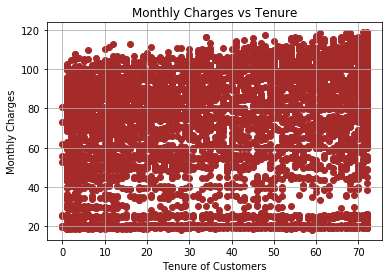

In [31]:
plt.scatter(x = customerChurn_data["tenure"],y = customerChurn_data["MonthlyCharges"], color = "brown", marker = "o", alpha = 1 )
plt.xlabel("Tenure of Customers")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges vs Tenure")
plt.grid(True)
plt.show()

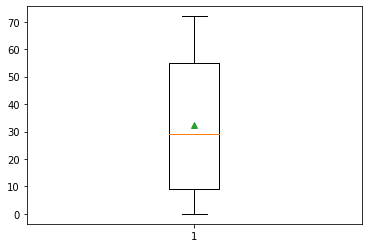

In [32]:
plt.boxplot(customerChurn_data["tenure"],showmeans = True)
plt.show()

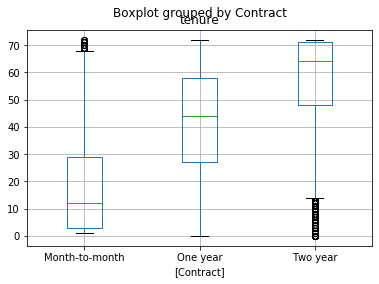

In [33]:
customerChurn_data.boxplot(column = ["tenure"], by = ["Contract"])

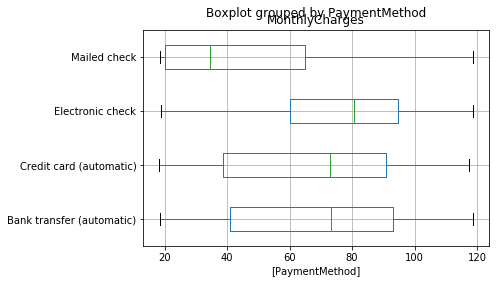

In [34]:
customerChurn_data.boxplot(column = ["MonthlyCharges"],vert =0,  by = ["PaymentMethod"])

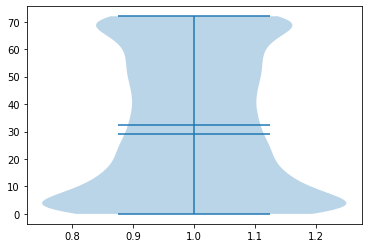

In [35]:
plt.violinplot(customerChurn_data["tenure"],  showmeans = True, showmedians = True)
plt.show()

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64


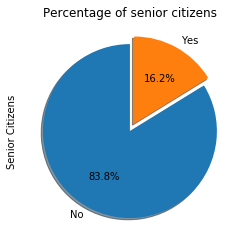

In [36]:
#plt.pie(customerChurn_data["SeniorCitizen"], )
size = (customerChurn_data["SeniorCitizen"].value_counts()*100/len(customerChurn_data))
print(size)
plt.pie((customerChurn_data["SeniorCitizen"].value_counts()*100/len(customerChurn_data)),labels = ["No","Yes"],autopct = "%1.1f%%", shadow = True, startangle = 90, explode = (0,0.1))
plt.title("Percentage of senior citizens")
plt.ylabel("Senior Citizens")
plt.show()

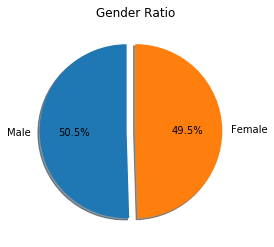

In [37]:
size_gender = customerChurn_data["gender"].value_counts()*100/len(customerChurn_data)
plt.pie(size_gender, labels = ["Male", "Female"], autopct = "%1.1f%%", shadow = True, startangle = 90, explode= (0.1,0))
plt.title("Gender Ratio")
plt.show()

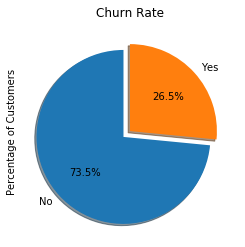

In [38]:
size_churn = customerChurn_data["Churn"].value_counts()*100/len(customerChurn_data)
plt.pie(size_churn, labels = ["No", "Yes"], autopct = "%1.1f%%", shadow = True, startangle = 90, explode= (0.1,0))
plt.ylabel("Percentage of Customers")
plt.title("Churn Rate")
plt.show()

In [39]:
plt.figure(figsize=(11,7))
customerChurn_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Figure size 792x504 with 0 Axes>

In [40]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = customerChurn_data[["MonthlyCharges"]]
x = customerChurn_data[["tenure"]]

In [41]:
y.head()


,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [42]:
x.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.30, random_state = 0)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [45]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_prediction = regression_model.predict(x_test)

In [47]:
y_test[:5],y_prediction[:5]

(      MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75, array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]))

In [48]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_prediction))
#print(mean_squared_error(y_test,y_prediction))


29.394584027273893

In [49]:
#Running the Logistic Regression

In [50]:
x = customerChurn_data[["MonthlyCharges"]]
y = customerChurn_data[["Churn"]]
x.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [51]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [52]:
#Splitting the data into Test and Train 

In [53]:
#Create Train and Test Data with 65:35 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35, random_state = 0)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4577, 1), (2466, 1), (4577, 1), (2466, 1))

In [55]:
#Running the Logistic Regression Model

In [56]:
#Run the Logistic Regression Model
#import the linear_model class from sklearn
from sklearn.linear_model import LogisticRegression

#log_model is an object of class LogisticRegression
log_model = LogisticRegression()
#callobject.fit on (x-train : set of predictors, y-train : target variables))
#65:35 ratio is used for the model
log_model.fit(x_train,y_train)
#model Learns from the training process


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#After training the model - we predict the class for rest of 35 percent
y_prediction = log_model.predict(x_test)

In [58]:
#Displaying first 5 rows of the test and the prediction model
y_test[:5], y_prediction[:5]

(     Churn
 2200    No
 4627    No
 3225    No
 2828    No
 3768    No, array(['No', 'No', 'No', 'No', 'No'], dtype=object))

In [59]:
#Confusion Matrix will discrete Actual and Predicted 
#False -ve : Predicted as -ve but actually is +ve
#False +ve : Predicted as +ve but actually is -ve
#True +ve : Predicted as +ve and actually is +ve
#True -ve : Predicted as -ve and actually is -ve
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
confusion_matrix(y_test,y_prediction), accuracy_score(y_test,y_prediction)
#1815 will be the true positives and 0 in the left diagonal(comprising of 1815 and 0) is the true negatives

(array([[1815,    0],
        [ 651,    0]], dtype=int64), 0.7360097323600974)

In [61]:
#that's how you can calculate accuracy manually
accuracy = (1815+0)/(1815+0+651+0)
print(accuracy)

0.7360097323600974


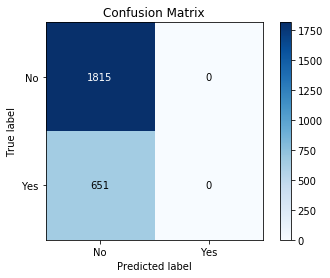

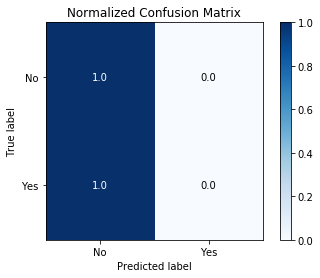

In [62]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prediction)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, y_prediction, normalize = True)
plt.show()

In [63]:
#Building a logistic regression model with multiple independent variables

In [64]:
x = customerChurn_data[["MonthlyCharges", "tenure"]]
y = customerChurn_data[["Churn"]]


In [65]:
x.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [66]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [68]:
from sklearn.linear_model import LogisticRegression

log_multi_model = LogisticRegression()
log_multi_model.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_prediction = log_multi_model.predict(x_test)

In [70]:
y_test[:5],y_prediction[:5]

(     Churn
 2200    No
 4627    No
 3225    No
 2828    No
 3768    No, array(['No', 'No', 'No', 'No', 'No'], dtype=object))

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [72]:
confusion_matrix(y_test,y_prediction), accuracy_score(y_test,y_prediction)

(array([[935, 106],
        [211, 157]], dtype=int64), 0.7750177430801988)

In [73]:
(935+157)/(935+157+211+106)
#935 will be the true positives and 157 in the left diagonal(comprising of 935 and 157) is the true negatives

0.7750177430801988

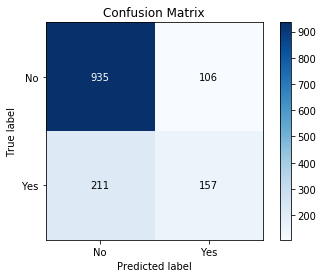

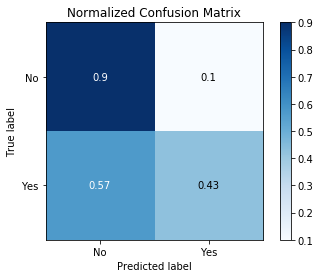

In [74]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prediction)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, y_prediction, normalize = True)
plt.show()

In [75]:
#Running the Decision Tree 

In [76]:
x = customerChurn_data[["tenure"]]
y = customerChurn_data[["Churn"]]



In [77]:
x.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [78]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [79]:
#Splitting the data set into 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((5634, 1), (1409, 1), (5634, 1), (1409, 1))

In [81]:
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
y_prediction = tree_model.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [84]:
confusion_matrix(y_test,y_prediction)

array([[965,  76],
       [281,  87]], dtype=int64)

In [85]:
accuracy = (965+87)/(965+87+281+76)
print(accuracy)

0.7466288147622427


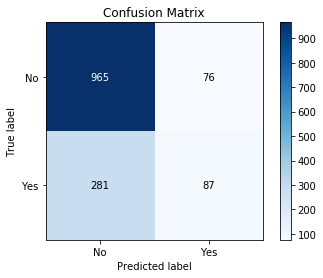

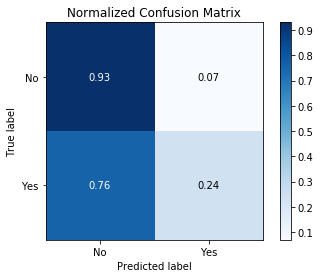

In [86]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prediction)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, y_prediction, normalize = True)
plt.show()

In [87]:
#Running the Random Forest

In [88]:
x = customerChurn_data[["MonthlyCharges","tenure"]]
y = customerChurn_data[["Churn"]]

In [89]:
x.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [90]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [92]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4930, 2), (2113, 2), (4930, 1), (2113, 1))

In [93]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()

randomForest.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_prediction = randomForest.predict(x_test)

In [95]:
y_test[:5],y_prediction[:5]

(     Churn
 2200    No
 4627    No
 3225    No
 2828    No
 3768    No, array(['No', 'No', 'No', 'No', 'Yes'], dtype=object))

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [97]:
confusion_matrix(y_test,y_prediction)


array([[1342,  218],
       [ 327,  226]], dtype=int64)

In [98]:
accuracy_score(y_test,y_prediction)


0.7420728821580691

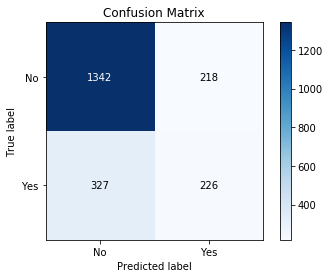

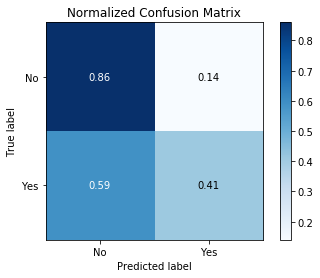

In [99]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prediction)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, y_prediction, normalize = True)
plt.show()

# Conclusion

The given project included retrieving the data, cleaning the given dataset, exploring different relationships between certain features and finally building different model to get an insight of the best fit model by using appropriate hyper parameters and performing feature engineering to select the best fit model.

The finest set of features include Total charges, tenure, monthly charges, contract month to month. Cost is the deciding factor if customers churn the services.


Finally, random forest classifier is the best fit model on most of the features be it univariate or multivariate with the highest presicion score and the highest accuracy.